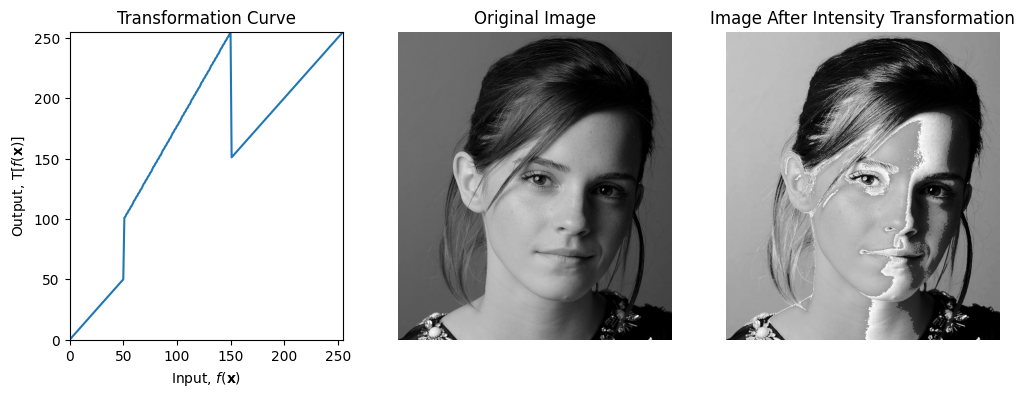

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5)).astype('uint8')

img_orig = cv.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_orig, transform).astype('uint8')  
    
# Plot the transformation curve
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

# Display original image
plt.subplot(132)
plt.imshow(img_orig, cmap="gray")
plt.title('Original Image')
plt.axis('off')

# Display transformed image
plt.subplot(133)
plt.imshow(img_transformed, cmap="gray")
plt.title('Image After Intensity Transformation')
plt.axis('off')

plt.show()
